# Project 3 : Car Price Analysis

You are an analyst at Crankshaft List. Hundreds of free vehicle ads appear on your website every day. You need to study data sets over the past few years and determine the factors that influence the price of a vehicle.

# Introduction

As an analyst at Crankshaft List, one of the routine tasks is carrying out data analysis according to requests from colleagues or management.

In this project, an analysis will be carried out on thousands of free vehicle sales advertisements displayed on websites. Previously, we studied the available data collection to test the hypothesis below and analyze what factors influence the price of a vehicle.

## Goals

The aim of this project is to find out what factors influence vehicle prices on the Crankshaft List website by proving the following hypothesis:
1. The selling price of a vehicle is influenced by several factors.
2. The main factors that determine the selling price of a vehicle are age, mileage, transmission type, condition, and color.
3. The selling price of a vehicle is inversely proportional to the age and mileage factors, meaning that the lower the age and mileage, the higher the selling price.
4. The newer the condition, the higher the selling price of the vehicle.
5. Vehicles with automatic transmission and black color have high selling prices.

## Steps

The free vehicle advertising dataset is stored in `File path: /datasets/vehicles_us.csv`. However, before continuing data analysis and testing hypotheses, it is necessary to check the quality of the data obtained.

First, an evaluation will be carried out regarding the quality of the data obtained and to investigate what significant problems have arisen. Then, during data pre-processing, significant problems that have the potential to interfere with subsequent analysis will be addressed so that bias in the results of data analysis can be avoided.
This project will consist of :
1. Data Overview and Data Preprocessing
     At this stage, you will do:
     - Initial data exploration
     - Resolve missing values
     - Fixed data types
     - Improve data quality
     - Checking clean data
3. Exploratory Data Analysis.
     At this stage, you will do:
     - Study core parameters
     - Study and handle outliers
     - Study core parameters without outliers
     - Know the validity period of advertisements
     - See the average price of each type of vehicle
     - Analyze selling price factors
4. General conclusion

### Pre-processing

To carry out data pre-processing, which aims to clean up problems that arise and then carry out hypothesis analysis, the first thing to do is import the required libraries, namely:
1. `Pandas Library`
2. `Matplotlib Library`

In [224]:
# Muat pandas library
import pandas as pd

# Muat matplotlib library
import matplotlib.pyplot as plt

#### Loading Data

The initial stage of data pre-processing is to create a .csv file of the free vehicle advertising dataset stored in `File path: /datasets/vehicles_us.csv` and store it in a data variable.

In [225]:
# Muat file data menjadi DataFrame dan menyimpannya dalam variabel data
data = pd.read_csv('/datasets/vehicles_us.csv')

In [226]:
data['model']

0                bmw x5
1            ford f-150
2        hyundai sonata
3            ford f-150
4          chrysler 200
              ...      
51520     nissan maxima
51521       honda civic
51522    hyundai sonata
51523    toyota corolla
51524     nissan altima
Name: model, Length: 51525, dtype: object

#### Exploring Initial Data

Your *dataset* contains the following columns:

- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — vehicle mileage when the ad was shown
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — date the ad was posted
- `days_listed` — number of days the ad was shown until it was removed

After getting the data variables, look at general information, descriptive statistical summary information, and several sample data points on these variables.

In [227]:
# menampilkan ringkasan statistika deskriptif dari data frame yang tersedia pada variabel data
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [228]:
# menampilkan sampel data varibael data
data.head(25)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


Based on the information from the example table displayed, at a glance, it can be seen that:
1. There are suspected duplicate and missing data in the data frame, some of which can be seen in the `model_year`, `odometer`, `paint_color`, and `is_4wd` columns
2. Inconsistent data format as seen in the `model`, `type` columns.
3. There are somewhat unreasonable values in the `price` and `model_year` columns.

So it is necessary to dig up further information regarding the data frame in the data variable. To overcome the above, we first dig deeper regarding general information on the `data` variable.

In [229]:
# menampilkan informasi umum DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


Based on general information, several interesting things can be found:
1. Each column has a different data type: `integer`, `object/string`, and `float`.
2. Some columns have data types that are slightly irrelevant to the column title, including the `model_year`, `cylinders`, and `is_4wd` columns.
3. The number of values is different in several columns, so it is certain that there is missing data in the `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd` columns.

In [230]:
data.isnull().sum() # menampilkan jumlah yang hilang pada setiap kolom dalam variabel data

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [231]:
# menampilakn persentase jumlah nilai yang hilang
a = data.count() # menghitung jumlah data pada setiap kolom exclude nilai NaN
b = data.fillna(-1).count() # menhitung total data pada setiap kolom dalam variabel data
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang pada setiap kolom variabel data
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase nilai yang hilang
c

,null,not_null,total,percent_null
price,0,51525,51525,0.000000
model_year,3619,47906,51525,7.023775
model,0,51525,51525,0.000000
condition,0,51525,51525,0.000000
cylinders,5260,46265,51525,10.208637
fuel,0,51525,51525,0.000000
odometer,7892,43633,51525,15.316836
transmission,0,51525,51525,0.000000
type,0,51525,51525,0.000000
paint_color,9267,42258,51525,17.985444


Missing data occurs in several columns, where the `is_4wd` column has the largest percentage above 50%. Of course, this is a little unreasonable; therefore, we need to analyze further regarding the missing data in several of these columns so that the best decision can be made. Is the missing data deleted from the data frame, or is the `Nan` value that appears in the column a natural thing that occurs in these columns?, we will conduct further analysis.

**Checking Data Format and Duplicate Data**

The next thing to do is check the data format and duplication in each column. The first column to check is the `type` column.

In [232]:
# Mari kita lihat semua nilai di kolom type untuk memeriksa ejaan apa yang perlu diperbaiki
data['type'].unique()# memeriksa nilai unik pada kolom type

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In the `type` column, it appears that there is no implicit duplication, but there is a slight problem regarding the data format, to make analysis easier, all data formats in this column will be equalized. Next, check the `model` column.

In [233]:
data['model'].unique()# memeriksa nilai unik pada kolom model

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In the model column, you can see quite a lot of vehicle models being sold. If you look more closely, there are several brands and types of vehicles being sold on the website. It can also be seen that there is implicit duplication among several vehicle brands, which is due to differences in writing format.

Next, further analysis needs to be carried out to group this data based on vehicle brand and improve the data format to eliminate implicit duplicates.

In [234]:
# menampilkan nilai pada kolom condition
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

There are no problems with the `condition` column, but for this categorical data, a dictionary needs to be created to facilitate our further analysis. Next, check the `is_4wd` column.

In [235]:
# menampilkan nilai pada kolom is_4wd
data['is_4wd'].unique()

array([ 1., nan])

There is something interesting about this column. Based on the column title, the most relevant answer or data content should be `yes` or `no` instead of the data content being an integer and most of the values being NaN. The temporary conclusion for this column is that there is a possibility that the integer `1` is a `yes` answer and `Nan` is a `no` answer. If that is the case, then it is necessary to improve the data type for this column and create a dictionary to facilitate further analysis.

In [236]:
# memeriksa duplikasi eksplisit pada setiap kolom
data.duplicated().sum()

0

There is no explicit duplication of the data frame variable data.

#### Conclusion and Next Steps

Based on the results of the initial data exploration, several columns look normal, namely the columns `price`, `condition`, `fuel`, `transmission`, `data_posted`, and `days_listed`, because there is no missing data in these columns. The data format and data type are also relevant to the data content in the column.
However, there are several problems with other columns, namely:
1. Indication of implicit duplication in `model` column.
2. Inconsistent data format in the `model` and `type` columns.
3. Data types that are not relevant to the `column` title and the data contents in the relevant column are in `model_year`, `cylinders`, `is_4wd`, and `date_posted` columns.
4. Missing data is in the `model_year`, `cylinders`, `odometer`, `paint_color`, and `is_4wd` columns.
5. There are somewhat unreasonable values in the `price` and `model_year` columns.

To overcome these problems, the steps taken are:
1. Fixed implicit duplication with .unique() and .replace() methods to improve data format.
2. Fixed the column so that data characters become lowercase in the `type` column.
3. Correct missing values using the .fillna() method based on the results of descriptive statistical calculations depending on the data content of each column and looking at the distribution of data in that column.
4. Change the data type in the `model_year` column to an integer, the `cylinder` column to an integer, and column`is_4wd` to an integer with additional information if necessary.

**1. Fixed implicit duplication in `model` column.**

In [237]:
# Mari kita lihat semua nilai di kolom model untuk memeriksa ejaan apa yang perlu diperbaiki
data_model_unique = data['model'].unique()# memeriksa nilai unik pada kolom model
list_model_unique = list(data_model_unique) # simpan nama model unik dalam bentuk list
list_model_unique.sort()# mengurutkan nama pada model unik
print(list_model_unique) # menampilkan model unik yang sudah diurutkan

['acura tl', 'bmw x5', 'buick enclave', 'cadillac escalade', 'chevrolet camaro', 'chevrolet camaro lt coupe 2d', 'chevrolet colorado', 'chevrolet corvette', 'chevrolet cruze', 'chevrolet equinox', 'chevrolet impala', 'chevrolet malibu', 'chevrolet silverado', 'chevrolet silverado 1500', 'chevrolet silverado 1500 crew', 'chevrolet silverado 2500hd', 'chevrolet silverado 3500hd', 'chevrolet suburban', 'chevrolet tahoe', 'chevrolet trailblazer', 'chevrolet traverse', 'chrysler 200', 'chrysler 300', 'chrysler town & country', 'dodge charger', 'dodge dakota', 'dodge grand caravan', 'ford econoline', 'ford edge', 'ford escape', 'ford expedition', 'ford explorer', 'ford f-150', 'ford f-250', 'ford f-250 sd', 'ford f-250 super duty', 'ford f-350 sd', 'ford f150', 'ford f150 supercrew cab xlt', 'ford f250', 'ford f250 super duty', 'ford f350', 'ford f350 super duty', 'ford focus', 'ford focus se', 'ford fusion', 'ford fusion se', 'ford mustang', 'ford mustang gt coupe 2d', 'ford ranger', 'ford 

In accordance with the previous analysis, there is implicit duplication in this column. Because it has been sorted, it can easily be seen that implicit duplication occurs, including:
- 'ford f-150',
- 'ford f-250',
- 'ford f-250 sd',
- 'ford f-250 super duty',
- 'ford f-350 sd',
- 'ford f150',
- 'ford f250',
- 'ford f250 super duty',
- 'ford f350 super duty',
- 'gmc sierra',
- 'gmc sierra 1500'

The duplication occurs due to errors in spelling and the use of abbreviations.

To remove it, we will use the `replace_wrong_model` function with two parameters:
- `wrong_model`: list of duplicates to replace
- `correct_model` : string/object with appropriate values

In [238]:
def replace_wrong_model(wrong_model, correct_model): 
    for wrong_model in wrong_model: 
        data['model'] = data['model'].replace(wrong_model, correct_model)
# fungsi untuk mengganti duplikat implisit dimana key berisi nama lama dan value berisi nama baru

In [239]:
# daftar model yang salah pengejaan
duplicates_1 = ['ford f-150'] 
duplicates_2 = ['ford f-250']
duplicates_3 = ['ford f-250 sd', 'ford f-250 super duty']
duplicates_4 = ['ford f-350 sd']
duplicates_5 = ['gmc sierra']

# nama yang benar
name_1 = 'ford f150' 
name_2 = 'ford f250'
name_3 = 'ford f250 super duty'
name_4 = 'ford f350 super duty'
name_5 = 'gmc sierra 1500'

In [240]:
# memanggil fungsi replace untuk setiap nama yang salah 
replace_wrong_model(duplicates_1, name_1)
replace_wrong_model(duplicates_2, name_2)
replace_wrong_model(duplicates_3, name_3)
replace_wrong_model(duplicates_4, name_4)
replace_wrong_model(duplicates_5, name_5)

In [241]:
data['model'].unique()

array(['bmw x5', 'ford f150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru impr

Implicit duplication in the `model` column has been successfully cleaned. Next, we do the next step.

**2. Memperbaiki kolom agar karakter data bertipe lowercase pada kolom `type`.**

In [242]:
# Mengubah karakter pada kolom model menjadi lowercase
data['type'] = data['type'].str.lower()

In [243]:
data['type'].unique()# memeriksa nilai unik pada kolom type

array(['suv', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

The value in the `type` column has been corrected. The next step is to address missing values and correct data types in some columns.

## Handling missing values

**Note :** relationships of interest between columns with missing values.

Based on previous analysis, it is known that there are missing values in the column:
- `model_year`
- `cylinders`
- `odometer`
- `paint_color`
- `is_4wd`

To deal with missing values in these columns, we first study their relationship with other columns to find out whether the missing values occur randomly or whether there is a certain pattern so that it can help us fill in or delete the missing values. For this reason, we will analyze the missing values per column.

### `model_year` column.

The `model_year` column contains information related to the year the vehicle was sold, which is related to the condition of the vehicle contained in the `condition` column. You will see what information is contained in the `condition` column and how it is distributed.

In [244]:
# memeriksa distribusi dataset berdasarkan kolom condition
data.groupby('condition').count()

,price,model_year,model,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
condition,,,,,,,,,,,,
excellent,24773,23074,24773,22174,24773,20973,24773,24773,20350,12742,24773,24773
fair,1607,1492,1607,1455,1607,1370,1607,1607,1311,813,1607,1607
good,20145,18695,20145,18134,20145,17053,20145,20145,16497,9663,20145,20145
like new,4742,4409,4742,4266,4742,4014,4742,4742,3882,2252,4742,4742
new,143,133,143,131,143,125,143,143,121,62,143,143
salvage,115,103,115,105,115,98,115,115,97,40,115,115


It is known that there are 5 value categories in the `condition` column. Let's look at the distribution of missing values in that column.

In [245]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom condition
a = data.groupby('condition')['model_year'].count() # melakukan grouping condition terhadap kolom model_year
b = data.fillna(-1).groupby('condition')['model_year'].count() # menghitung semua condition terhadap kolom model_year
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase data yang hilang 
c   

,null,not_null,total,percent_null
condition,,,,
excellent,1699,23074,24773,6.858273
fair,115,1492,1607,7.156192
good,1450,18695,20145,7.197816
like new,333,4409,4742,7.022353
new,10,133,143,6.993007
salvage,12,103,115,10.434783


**Findings**

From the distribution of the amount of missing data in the `model_year` column, it is known that almost all vehicle conditions have missing data, with the largest percentage being in the `salvage` vehicle condition, but the amount is not significant. Based on the numbers, the `excellent` condition contributed the largest amount of missing data.

Based on this data, it is known that the missing data occurs randomly for vehicle conditions. Because the missing values in the `model_year` column are quite small, namely `7%`, the missing values will be filled in.

**Handling missing values**

To resolve missing values in the `model_year` column, the factor from the `model` column will be looked at, where missing values in the `model_year` column will be replaced by the median value based on the parameters of the `model` column.

To facilitate analysis, we will group the data in the `model` column based on the vehicle brand and store it in a new `brand` column.

In [246]:
# Membuat kolom baru brand yang memuat informasi brand dari model kendaraan yang diiklan-kan
# Buat fungsi yang melakukan pengkategorian menjadi kelompok brand
def brand(a):
    if 'acura' in a:
        return 'acura'
    elif ('bmw' in a):
        return 'bmw'
    elif ('buick'in a):
        return 'buick'
    elif ('cadillac' in a):
        return 'cadillac'
    elif ('chevrolet' in a):
        return 'chevrolet'
    elif ('chrysler' in a):
        return 'chrysler'
    elif ('dodge' in a):
        return 'dodge'
    elif ('ford' in a):
        return 'ford'
    elif ('gmc' in a):
        return 'gmc'
    elif ('honda' in a):
        return 'honda'
    elif ('hyundai' in a):
        return 'hyundai'
    elif ('jeep' in a):
        return 'jeep'
    elif ('kia' in a):
        return 'kia'
    elif ('merc' in a):
        return 'mercy'
    elif ('nissan' in a):
        return 'nissan'
    elif ('ram' in a):
        return 'ram'
    elif ('subaru' in a):
        return 'subaru'
    elif ('toyota' in a):
        return 'toyota'
    elif ('volks' in a):
        return 'vw'

In [247]:
# Buat kolom yang memuat kelompok brand
data['brand'] = data['model'].apply(brand)# membuat kolom yang memuat kelompok brand

In [248]:
data['brand'].value_counts() # menampilan jumlah nilai pada setiap parameter kolom brand

ford         12672
chevrolet    10611
toyota        5445
honda         3485
ram           3316
jeep          3281
nissan        3208
gmc           2378
subaru        1272
dodge         1255
hyundai       1173
vw             869
chrysler       838
kia            585
cadillac       322
buick          271
bmw            267
acura          236
mercy           41
Name: brand, dtype: int64

Then the median value of the `brand` column will be calculated with the help of `pivot_table`.

In [249]:
# membuat variabel yang memuat informasi median model_year pada kolom brand
median_brand_based_model_year = data.pivot_table(index = 'brand', values = 'model_year', aggfunc='median')
median_brand_based_model_year

,model_year
brand,
acura,2007.0
bmw,2010.0
buick,2012.0
cadillac,2009.0
chevrolet,2011.0
chrysler,2012.0
dodge,2012.0
ford,2011.0
gmc,2010.0


In [250]:
# membuat dictionary nilai median dari tiap brand kendaraan dan menyimpannya dalam variabel dict_model_year_brand
dict_model_year_brand = median_brand_based_model_year['model_year'].to_dict()

In [251]:
# membuat fungsi untuk mengganti nilai null pada kolom model_year dengan nilai median tiap brand yang sesuai
def year_null(a):
    brand = a['brand']
    model_year = a['model_year']
    if model_year == -1:
        return dict_model_year_brand[brand]
    else:
        return model_year

In [252]:
# menerapkan fungsi dan menyimpannya dalam kolom model_year
data['model_year'] = data[['brand', 'model_year']].fillna(-1).apply(year_null, axis=1)

In [253]:
# memeriksa nilai yang hilang pada kolom model_year
data['model_year'].isna().sum()

0

Missing data in the `model_year` column has been successfully cleaned. Next, we will fill in the missing values in the `cylinder` column.

### `cylinders` column

The `cylinders` column contains the value of the number of cylinders the advertised vehicle has, it is possible that the number of cylinders is influenced by the type of vehicle transmission.

First, we will check the distribution of missing values in the `cylinders` column based on the `transmission` column.

In [254]:
data.groupby('transmission').count()

,price,model_year,model,condition,cylinders,fuel,odometer,type,paint_color,is_4wd,date_posted,days_listed,brand
transmission,,,,,,,,,,,,,
automatic,46902,46902,46902,46902,42120,46902,39716,46902,38499,23421,46902,46902,46902
manual,2829,2829,2829,2829,2523,2829,2403,2829,2315,1206,2829,2829,2829
other,1794,1794,1794,1794,1622,1794,1514,1794,1444,945,1794,1794,1794


There are several values in the `transmission` column, we will try to see the distribution of missing `cylinders` values based on this column.

In [255]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom cylinders
a = data[['transmission', 'cylinders']].groupby('transmission').count() # melakukan grouping cylinders terhadap kolom transmission
b = data[['transmission', 'cylinders']].fillna(-1).groupby('transmission').count() # menghitung semua cylinders terhadap kolom transmission
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase data yang hilang 
c   

,null,not_null,total,percent_null
transmission,,,,
automatic,4782,42120,46902,10.195727
manual,306,2523,2829,10.816543
other,172,1622,1794,9.587514


**Findings**

From the distribution of the amount of missing data in the `transmission` column, it is known that almost all types of vehicle transmissions have missing data, with the largest percentage being in `manual` transmissions, but the amount is not significant. By number, `automatic` transmissions accounted for the largest amount of lost data.

Based on this data, it is known that the missing data occurs randomly for the condition of the vehicle because the percentage of missing values is quite small at `10%` so the missing values will be filled in.

**Handling missing values**

Just like the steps for dealing with missing columns in the `model_year` column, to resolve missing values in the `cylinders` column, we will look at the factor from the `brand` column, where the missing values in the `cylinders` column will be replaced by the median value based on the `column parameters brand`.

To facilitate analysis, we will group the data in the `model` column based on the vehicle brand and store it in a new `brand` column.

In [256]:
# membuat variabel yang memuat pivot_table nilai median cylinder berdasarkan kelompok brand
median_cylinder_based_brand = data.pivot_table(index='brand', values='cylinders', aggfunc='median')
median_cylinder_based_brand

,cylinders
brand,
acura,6.0
bmw,6.0
buick,6.0
cadillac,8.0
chevrolet,8.0
chrysler,6.0
dodge,6.0
ford,6.0
gmc,8.0


In [257]:
# membuat dictionariy variabel median_cylinder_based_brand
dict_median_cylinder_brand = median_cylinder_based_brand['cylinders'].to_dict()
dict_median_cylinder_brand

{'acura': 6.0,
 'bmw': 6.0,
 'buick': 6.0,
 'cadillac': 8.0,
 'chevrolet': 8.0,
 'chrysler': 6.0,
 'dodge': 6.0,
 'ford': 6.0,
 'gmc': 8.0,
 'honda': 4.0,
 'hyundai': 4.0,
 'jeep': 6.0,
 'kia': 4.0,
 'mercy': 6.0,
 'nissan': 4.0,
 'ram': 8.0,
 'subaru': 4.0,
 'toyota': 4.0,
 'vw': 4.0}

In [258]:
# membuat fungsi untuk mengganti nilai yang hilang dengan nilai median dari setiap brand
def cylinder_null(b):
    brand = b['brand']
    cylinder = b['cylinders']
    if cylinder == -1:
        return dict_median_cylinder_brand[brand]
    else:
        return cylinder

In [259]:
# mengaplikasikan fungsi penggantian nilai yang hilang
data['cylinders'] = data[['brand', 'cylinders']].fillna(-1).apply(cylinder_null, axis=1)

In [260]:
# menampilkan jumlah nilai yang hilang pada kolom cylinder
data['cylinders'].isna().sum()

0

The missing data in the `cylinders` column has been successfully cleaned. Next, we will fill in the missing values in the `odometer` column.

### `is_4wd` column

As in the previous analysis, the column contains information on whether the vehicle being sold has four-wheel drive or not. In general, the data type for this column is boolean, where the answer is `true` or `false`.
You will see the contents of the data in this column again.

In [261]:
data['is_4wd'].unique() # melihat nilai pada kolom is_4wd

array([ 1., nan])

The data content in this column only contains the integer `1` and missing values / NaN, where the percentage of NaN amounts is around `50%`, it can be concluded that:
- The integer `1` is the answer `True`
- Missing values are `False` answers.

To facilitate our analysis, missing values will be filled with the integer `0`, which means the answer is `False` in the `is_4wd` column.

In [262]:
data['is_4wd'].fillna(0, inplace = True) # mengisi nilai yang hilang dengan integer 0

In [263]:
data['is_4wd'].unique() # melihat nilai pada kolom is_4wd

array([1., 0.])

Missing values in the `is_4wd` column have been successfully resolved.

### `odometer` column

The `odometer` column contains information on the vehicle's advertised mileage. It is possible that this mileage is influenced by the condition of the vehicle, which usually means that a new vehicle may have a low or even zero odometer.

The distribution of missing columns in `condition` will be checked based on the distance traveled in the `odometer` column.

In [264]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom condition
a = data[['condition', 'odometer']].groupby('condition').count() # melakukan grouping odometer terhadap kolom condition
b = data[['condition', 'odometer']].fillna(-1).groupby('condition').count() # menghitung semua odometer terhadap kolom condition
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase data yang hilang 
c   

,null,not_null,total,percent_null
condition,,,,
excellent,3800,20973,24773,15.339281
fair,237,1370,1607,14.747978
good,3092,17053,20145,15.348722
like new,728,4014,4742,15.352172
new,18,125,143,12.587413
salvage,17,98,115,14.782609


**Findings**

From the distribution of the amount of missing data in the `condition` column, it is known that almost all vehicle conditions have missing data, where `excellent` and `good` conditions contribute the most null data.

Based on this data, it is known that the missing data occurs randomly for the odometer. Because the number of missing values in this column is quite small, namely `15%`, the missing values will be filled in.

**Handling missing values**

The steps for dealing with missing values in the `odometer` column will be slightly different from dealing with missing values in the `model_year` and `cylinder` columns. Because the value in this column is a numeric data type, the missing value will be resolved by looking at the average odometer factor for all vehicles based on the vehicle type contained in the `type` column.

To facilitate analysis, missing values will be deleted, and the following columns will be created:
- `year_posted` - the year the ad was posted
- `age` - vehicle age, obtained from the difference between year_posted and model_year
- `odometer_year` - average odometer per year

from data frames that do not contain missing values.

In [265]:
# membuat data frame tanpa nilai yang hilang
data_not_null = data.dropna()
data_not_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35821 entries, 1 to 51523
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         35821 non-null  int64  
 1   model_year    35821 non-null  float64
 2   model         35821 non-null  object 
 3   condition     35821 non-null  object 
 4   cylinders     35821 non-null  float64
 5   fuel          35821 non-null  object 
 6   odometer      35821 non-null  float64
 7   transmission  35821 non-null  object 
 8   type          35821 non-null  object 
 9   paint_color   35821 non-null  object 
 10  is_4wd        35821 non-null  float64
 11  date_posted   35821 non-null  object 
 12  days_listed   35821 non-null  int64  
 13  brand         35821 non-null  object 
dtypes: float64(4), int64(2), object(8)
memory usage: 4.1+ MB


In [266]:
data_not_null['type'].value_counts()

truck          8694
suv            8629
sedan          8408
pickup         4781
coupe          1621
wagon          1078
mini-van        816
hatchback       728
van             390
convertible     319
other           183
offroad         156
bus              18
Name: type, dtype: int64

In [267]:
# membuat kolom baru yang berisi data tahun posting iklan
data_not_null['year_posted'] = pd.DatetimeIndex(data_not_null['date_posted']).year

/tmp/ipykernel_27/2084872255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_null['year_posted'] = pd.DatetimeIndex(data_not_null['date_posted']).year


In [268]:
# membuat kolom baru yang berisi usia kendaraan
data_not_null['age'] = data_not_null['year_posted'] - data_not_null['model_year']

/tmp/ipykernel_27/3849054870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_null['age'] = data_not_null['year_posted'] - data_not_null['model_year']


In [269]:
# membuat kolom baru yang memuat rata-rata odometer per tahun
data_not_null['odometer_year'] = data_not_null['odometer'] / data_not_null['age']

/tmp/ipykernel_27/1773250119.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_null['odometer_year'] = data_not_null['odometer'] / data_not_null['age']


In [270]:
# mengelompokan median odometer per tahun berdasarkan tipe kendaraan
odometer_year_median_type = data_not_null.pivot_table(index='type', values='odometer_year', aggfunc='median')
odometer_year_median_type

,odometer_year
type,
bus,2433.857143
convertible,6945.571429
coupe,10600.000000
hatchback,15491.714286
mini-van,16364.166667
offroad,9354.166667
other,14608.666667
pickup,15880.423077
sedan,15500.000000


In [271]:
# mengubah variabel odometer_year_mean_type menjadi dictionary
dict_odo_year_type = odometer_year_median_type['odometer_year'].to_dict()
dict_odo_year_type

{'bus': 2433.8571428571427,
 'convertible': 6945.571428571428,
 'coupe': 10600.0,
 'hatchback': 15491.714285714286,
 'mini-van': 16364.166666666668,
 'offroad': 9354.166666666668,
 'other': 14608.666666666666,
 'pickup': 15880.423076923078,
 'sedan': 15500.0,
 'suv': 15454.545454545454,
 'truck': 16052.9,
 'van': 15392.166666666668,
 'wagon': 15000.0}

In [272]:
# membuat fungsi untuk mengisi nilai yang hilang pada kolom odometer
def odo(c):
    types = c['type']
    odometer = c['odometer']
    if odometer == -1:
        return dict_odo_year_type[types]
    else:
        return odometer

In [273]:
# mengaplikasikan fungsi penggantian kolom yang hilang
data['odometer'] = data[['type', 'odometer']].fillna(-1).apply(odo, axis=1)

In [274]:
# menampilkan nilai yang hilang pada kolom odometer
data['odometer'].isna().sum()

0

Missing values in the `odometer` column were successfully resolved. Next, fix the missing values in the `paint_color` column.

### `paint_color` column

The `paint_color` column contains information about the color of the advertised vehicle. It is possible that the vehicle color is influenced by the vehicle model. The distribution of missing value data in this column will be checked based on vehicle type.

A total of `18 %` values are missing in the `paint_color` column.

In [275]:
data['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [276]:
# Dihitung jumlah warna based brand,ambil rank warna tertinggi tiap brand

In [277]:
# melihat jumlah nilai yang hilang dari setiap nilai pada kolom condition
a = data[['model', 'paint_color']].groupby('model').count() # melakukan grouping odometer terhadap kolom condition
b = data[['model', 'paint_color']].fillna(-1).groupby('model').count() # menghitung semua odometer terhadap kolom condition
c = pd.concat([a, b], axis=1)
c.columns = ['not_null', 'total']
c['null'] = c['total'] - c['not_null'] # membuat kolom jumlah data yang hilang
c = c[['null', 'not_null', 'total']]
c['percent_null'] = c['null']*100 / c['total'] # menghitung persentase data yang hilang 
c 

,null,not_null,total,percent_null
model,,,,
acura tl,48,188,236,20.338983
bmw x5,58,209,267,21.722846
buick enclave,42,229,271,15.498155
cadillac escalade,64,258,322,19.875776
chevrolet camaro,72,342,414,17.391304
...,...,...,...,...
toyota sienna,65,264,329,19.756839
toyota tacoma,146,681,827,17.654172
toyota tundra,111,492,603,18.407960


**Findings**

From the distribution of the amount of missing data in the `model` column, it is known that almost all types of vehicles have missing data with a percentage above `10%`. Based on this data, it is known that the missing data occurs randomly for the vehicle model because the percentage of missing values is `18%` so the missing values will be filled in.

**Handling missing values**

Similar to the steps for dealing with missing columns in the `model_year` and `cylinder` columns, to resolve missing values in the `paint_color` column, you will look at the factor from the `brand` column, where the missing values in the `paint_color` column will be replaced by the mode value based on the `brand` column parameter.

In [278]:
# mengelompokan data berdasarkan brand, paint_color beserta jumlahnya
data_color = data.groupby(['brand', 'paint_color']).count()[['model']].reset_index()
data_color

,brand,paint_color,model
0,acura,black,44
1,acura,blue,9
2,acura,brown,2
3,acura,custom,2
4,acura,green,7
...,...,...,...
197,vw,green,7
198,vw,grey,121
199,vw,red,63
200,vw,silver,150


In [279]:
# membuat rangking paint_color berdasarkan brand
data_color["RANK"] = data_color.groupby("brand")["model"].rank(method="first", ascending=False)
data_color

,brand,paint_color,model,RANK
0,acura,black,44,2.0
1,acura,blue,9,5.0
2,acura,brown,2,8.0
3,acura,custom,2,9.0
4,acura,green,7,6.0
...,...,...,...,...
197,vw,green,7,8.0
198,vw,grey,121,4.0
199,vw,red,63,6.0
200,vw,silver,150,2.0


In [280]:
# menyimpan data rangking ` atau jumlah paint_color terbanyak pada variabel rank_color
rank_color = data_color[data_color['RANK'] == 1.0]
rank_color

,brand,paint_color,model,RANK
5,acura,grey,55,1.0
10,bmw,black,66,1.0
29,buick,white,69,1.0
30,cadillac,black,101,1.0
49,chevrolet,white,2260,1.0
51,chrysler,black,158,1.0
71,dodge,white,218,1.0
83,ford,white,3170,1.0
95,gmc,white,629,1.0
102,honda,grey,540,1.0


In [281]:
# membuat dictionary data frame rank_color dengan mengambil data pada kolom brand sebagai key dan kolom paint_color sebagai value
dict_rank_color = rank_color[['brand', 'paint_color']].set_index('brand')['paint_color'].to_dict()

In [282]:
# membuat fungsi untuk mengisi nilai yang hialng pada kolom paint color
def color(d):
    brand = d['brand']
    paint_color = d['paint_color']
    if paint_color == -1:
        return dict_rank_color[brand]
    else:
        return paint_color

In [283]:
# mengaplikasikan fungsi penggantian kolom yang hilang
data['paint_color'] = data[['brand', 'paint_color']].fillna(-1).apply(color, axis=1)

In [284]:
# menampilkan jumlah nilai yang hilang
data['paint_color'].isna().sum()

0

Missing values in the `paint_color` column were successfully resolved. Next, improve the data types in several columns.

## Fixed Data Type

Based on previous analysis, it is known that the `model_year`, `cylinder`, and `is_4wd` columns have data types that are not relevant to the column contents, so the 3 columns will be changed to the `integer` data type.

In [285]:
# mengubah tipe data kolom model_year, cylinders, dan is_4wd menjadi integer
data[['model_year', 'cylinders', 'is_4wd']] = data[['model_year', 'cylinders', 'is_4wd']].astype('int')

Change the data type in the `date_posted` column to make it easier to retrieve the values for the day, month and year when the ad was posted.

In [286]:
# mengubah tipe data kolom date_posted menjadi date time
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

In [287]:
# menampilkan informasi umum data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  brand         51525 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(7)
memory usage: 5.5+ MB


Changing data types has gone smoothly.

## Improving Data Quality

To facilitate further graphic analysis, several additional new columns will be created, namely:
1. `day_posted` - the day the vehicle was advertised
2. `month_posted` - the month the vehicle was advertised
3. `year-posted` — the year the vehicle was advertised
4. `age` — the age of the vehicle
5. `odometer_year`— average vehicle mileage per year

And replace the string value in the `condition` column with a numeric parameter, where:
1. `new` - 5
2. `like new` - 4
3. `excellent` - 3
4. `good` - 2
5. `fair` - 1
6. `salvage` - 0

In [288]:
# Tambahkan nilai waktu dan tanggal pada saat iklan ditayangkan 
data['day_posted'] = data['date_posted'].dt.weekday

In [289]:
# Menambahkan kolom bulan iklan ditanyangkan
data['month_posted'] = data['date_posted'].dt.month

In [290]:
# Tambahkan usia kendaraan saat iklan ditayangkan
data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year
data['age'] = data['year_posted'] - data['model_year']

In [291]:
# Tambahkan jarak tempuh rata-rata kendaraan per tahun 
data['odometer_year'] = data['odometer'] / data['age']

In [292]:
# Mungkin membantu untuk mengganti nilai pada kolom 'condition' dengan sesuatu yang dapat dimanipulasi dengan lebih mudah 
# fungsi untuk mengganti nilai pada kolom condition
def replace_condition(old_condition, new_condition): 
    data['condition'] = data['condition'].replace(old_condition, new_condition)

# daftar condition lama
old_1 = 'new'
old_2 = 'like new'
old_3 = 'excellent'
old_4 = 'good'
old_5 = 'fair'
old_6 = 'salvage'

# daftar condition baru
new_1 = 5
new_2 = 4
new_3 = 3
new_4 = 2
new_5 = 1
new_6 = 0

# memanggil fungsi replace untuk setiap condition
replace_condition(old_1, new_1)
replace_condition(old_2, new_2)
replace_condition(old_3, new_3)
replace_condition(old_4, new_4)
replace_condition(old_5, new_5)
replace_condition(old_6, new_6)

## Checking Clean Data

The stages of data improvement have been carried out according to the initial plan before continuing with exploratory data analysis. First, general data information and examples of data samples will be displayed.

In [293]:
# tampilkan informasi/rangkuman umum tentang DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   price          51525 non-null  int64         
 1   model_year     51525 non-null  int64         
 2   model          51525 non-null  object        
 3   condition      51525 non-null  int64         
 4   cylinders      51525 non-null  int64         
 5   fuel           51525 non-null  object        
 6   odometer       51525 non-null  float64       
 7   transmission   51525 non-null  object        
 8   type           51525 non-null  object        
 9   paint_color    51525 non-null  object        
 10  is_4wd         51525 non-null  int64         
 11  date_posted    51525 non-null  datetime64[ns]
 12  days_listed    51525 non-null  int64         
 13  brand          51525 non-null  object        
 14  day_posted     51525 non-null  int64         
 15  month_posted   5152

In [294]:
# tampilkan sampel data 
data.head(15)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
0,9400,2011,bmw x5,2,6,gas,145000.000000,automatic,suv,black,1,2018-06-23,19,bmw,5,6,2018,7,20714.285714
1,25500,2011,ford f150,2,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,ford,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,hyundai,3,2,2019,6,18333.333333
3,1500,2003,ford f150,1,8,gas,15880.423077,automatic,pickup,white,0,2019-03-22,9,ford,4,3,2019,16,992.526442
4,14900,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,chrysler,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954.000000,automatic,sedan,black,1,2018-06-20,15,chrysler,2,6,2018,4,14488.500000
6,12990,2015,toyota camry,3,4,gas,79212.000000,automatic,sedan,white,0,2018-12-27,73,toyota,3,12,2018,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473.000000,automatic,suv,black,1,2019-01-07,68,honda,0,1,2019,6,18245.500000
8,11500,2012,kia sorento,3,4,gas,104174.000000,automatic,suv,white,1,2018-07-16,19,kia,0,7,2018,6,17362.333333
9,9200,2008,honda pilot,3,4,gas,147191.000000,automatic,suv,blue,1,2019-02-15,17,honda,4,2,2019,11,13381.000000


## Study Core Parameters

The next step taken is to carry out exploratory data analysis to see outliers and visualize the data in the form of a histogram or box-plot graph to facilitate analysis in determining the factors that sell vehicles. First, we will check and study the following parameters:
- Price
- Vehicle age when the ad is displayed
- Mileage
- Number of cylinders
- Condition

### `price` column parameter

Text(0, 0.5, 'Jumlah kendaraan')

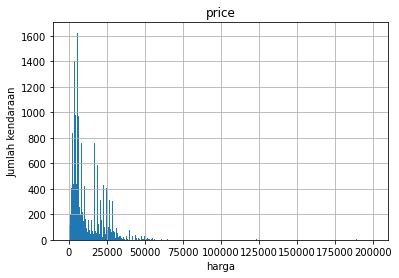

In [295]:
# membuat grafik histogram parameter harga
data.hist('price', bins=1000, range=(0, 200000))

plt.xlabel('harga')
plt.ylabel('Jumlah kendaraan')

Based on the histogram graph above, it can be seen that most of the data gathers around the price range of `0` to `25,000`, and the higher the price, the shorter the peak, indicating that the number of cars sold at a high price is becoming rarer. However, it is interesting that there is a small peak between `100000` and `125000` and `175,000` and `200,000`, which indicates this data is an outlier. A histogram will be created in this price range to deepen it.

Text(0, 0.5, 'Jumlah kendaraan')

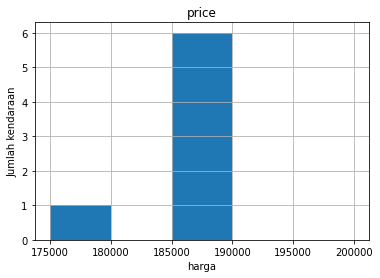

In [296]:
# membuat grafik histogram pada rentang 175000-200000
data.hist('price', bins=5, range=(175000, 200000))

plt.xlabel('harga')
plt.ylabel('Jumlah kendaraan')

It is clear that there is very high vehicle price data at `175,000` and `185,000`. You will see what vehicle models are being sold at that price.

To see the vehicle model at this price, the **.query()** method will be used.

In [297]:
# melakukan irisan data mengambil data frame dengan harga diatas 175000
price_very_high = data.query('price > 175000')
price_very_high

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
1309,189000,2014,ford f150,2,6,gas,151248.0,automatic,truck,black,0,2019-03-02,56,ford,5,3,2019,5,30249.600000
1668,189000,2014,ford f150,2,6,gas,151248.0,automatic,truck,white,0,2019-03-20,21,ford,2,3,2019,5,30249.600000
11359,300000,2015,ram 2500,3,8,diesel,16052.9,automatic,truck,grey,1,2018-10-15,39,ram,0,10,2018,3,5350.966667
12504,375000,1999,nissan frontier,2,6,gas,115000.0,automatic,pickup,blue,1,2018-05-19,21,nissan,5,5,2018,19,6052.631579
27375,189000,2014,ford f150,2,6,gas,151248.0,automatic,truck,black,0,2018-09-25,72,ford,1,9,2018,4,37812.000000
30634,189000,2014,ford f150,2,6,gas,16052.9,automatic,truck,black,0,2018-07-21,42,ford,5,7,2018,4,4013.225000
33434,189000,2014,ford f150,2,6,gas,151248.0,automatic,truck,black,0,2019-02-05,102,ford,1,2,2019,5,30249.600000
34389,189000,2014,ford f150,2,6,gas,151248.0,automatic,truck,black,0,2019-02-02,28,ford,5,2,2019,5,30249.600000


It can be seen that there are several vehicle models with the Ford, Nissan, and Ram brands, where the only types of vehicles with very high prices are trucks and pickups. All Ford brands with very high prices only occur on the 2014 Ford F150 model with the same odometer value and the same color, but with different posting dates, so it is suspected that the same vehicle was advertised more than once on the same date. different.

Because the amount of data with very high prices is small and occurs in certain models, this data will be considered an *outlier*.

Text(0, 0.5, 'Jumlah kendaraan')

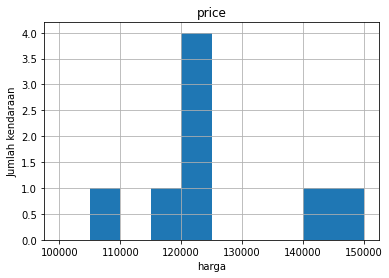

In [298]:
# membuat grafik histogram pada rentang 100000-150000
data.hist('price', bins=10, range=(100000, 150000))

plt.xlabel('harga')
plt.ylabel('Jumlah kendaraan')

It is clear that there is data on high vehicle prices in the price range of `100,000 - 150,000`. You will see what vehicle models are being sold at that price.

In [299]:
# melakukan irisan data mengambil data frame dengan rentang harga 100000 - 150000
price_high = data.query('100000 < price < 150000')
price_high

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
20700,109999,2011,chevrolet corvette,5,8,gas,35.000000,automatic,coupe,white,0,2018-09-07,74,chevrolet,4,9,2018,7,5.000000
22833,115000,2012,ford f250 super duty,2,8,diesel,225000.000000,automatic,truck,white,0,2018-12-08,53,ford,5,12,2018,6,37500.000000
24999,140000,2004,ram 2500,2,6,diesel,249000.000000,automatic,truck,red,1,2019-01-22,8,ram,1,1,2019,15,16600.000000
29810,123456,2000,chevrolet suburban,2,8,gas,123456.000000,manual,truck,silver,0,2018-05-09,40,chevrolet,2,5,2018,18,6858.666667
36822,123456,2000,chevrolet suburban,2,8,gas,16052.900000,manual,truck,silver,0,2018-12-25,33,chevrolet,1,12,2018,18,891.827778
41748,145000,2008,toyota tundra,4,4,gas,140000.000000,automatic,truck,red,1,2018-06-16,29,toyota,5,6,2018,10,14000.000000
42853,123456,2005,chevrolet suburban,1,8,gas,15454.545455,automatic,suv,silver,1,2019-03-06,21,chevrolet,2,3,2019,14,1103.896104
45263,120000,2006,chevrolet silverado 1500,2,8,gas,136000.000000,automatic,truck,blue,1,2018-05-22,27,chevrolet,1,5,2018,12,11333.333333


It can be seen that there are several vehicle models with the Chevrolet, Ford, Ram, and Toyota brands, where vehicle types with very high prices also occur for truck types as well as SUV and coupe types.

Because the amount of data with very high prices is small and occurs in certain models, this data will be considered an *outlier*. Next, we will focus on the histogram with the price range `0 - 50000`.

Text(0, 0.5, 'Jumlah kendaraan')

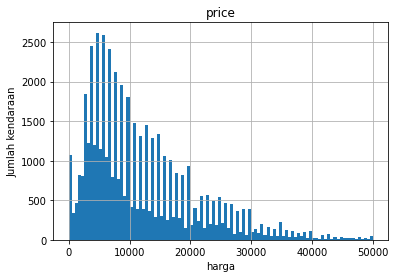

In [300]:
# membuat grafik histogram pada rentang 0-50000
data.hist('price', bins=100, range=(0, 50000))

plt.xlabel('harga')
plt.ylabel('Jumlah kendaraan')

Based on the histogram above, where the high price range has been filtered out, it can be seen that around `1000` of vehicles were sold at prices close to `0`. A histogram will be created again in this price range.

Text(0, 0.5, 'Jumlah kendaraan')

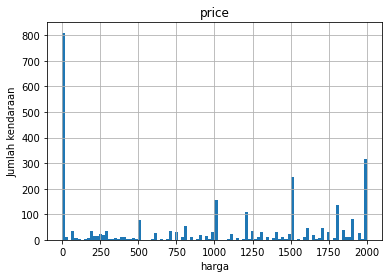

In [301]:
# membuat grafik histogram pada rentang 0-2000
data.hist('price', bins=100, range=(0, 2000))

plt.xlabel('harga')
plt.ylabel('Jumlah kendaraan')

Based on the histogram above, it can be seen that there are several vehicles being sold for under `1000`, and uniquely, as many as 800 vehicles are being sold at `0`, of course this is a little unreasonable. A price histogram will be created again in the price range close to `0`.

Text(0, 0.5, 'Jumlah kendaraan')

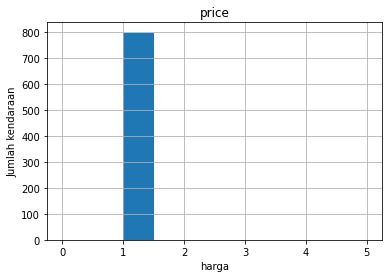

In [302]:
# membuat grafik histogram pada rentang 0-5
data.hist('price', bins=10, range=(0, 5))

plt.xlabel('harga')
plt.ylabel('Jumlah kendaraan')

It is clear that there are `800 units` of vehicles being sold at a price of `1`; normally, this price is very unreasonable, but this does not rule out the possibility of discounts or auctions for these vehicles.

You will see what vehicle model is advertised at that price.

In [303]:
# melakukan irisan data mengambil data frame dengan rentang harga 100000 - 150000
price_too_low = data.query(' price < 2')
price_too_low.head(25)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
405,1,2014,chevrolet camaro,3,6,gas,71310.000000,automatic,coupe,white,0,2018-07-14,29,chevrolet,5,7,2018,4,1.782750e+04
3063,1,1998,chevrolet silverado,2,8,gas,164000.000000,automatic,pickup,white,1,2018-10-11,49,chevrolet,3,10,2018,20,8.200000e+03
3808,1,2007,chevrolet tahoe,2,8,gas,200.000000,automatic,suv,red,0,2019-03-18,63,chevrolet,0,3,2019,12,1.666667e+01
3902,1,1996,ford f150,1,6,gas,163000.000000,manual,truck,white,0,2019-02-23,54,ford,5,2,2019,23,7.086957e+03
4140,1,2004,chevrolet silverado,3,8,diesel,83000.000000,automatic,pickup,white,1,2019-02-04,14,chevrolet,0,2,2019,15,5.533333e+03
5612,1,2006,gmc sierra 1500,3,8,gas,192960.000000,automatic,truck,white,0,2018-10-29,39,gmc,0,10,2018,12,1.608000e+04
5700,1,2015,ram 2500,3,6,diesel,103549.000000,automatic,truck,red,1,2018-07-31,45,ram,1,7,2018,3,3.451633e+04
5718,1,2009,toyota tacoma,2,6,gas,168955.000000,automatic,truck,silver,1,2018-12-31,40,toyota,0,12,2018,9,1.877278e+04
5907,1,2011,toyota tacoma,2,6,gas,168955.000000,automatic,truck,silver,1,2019-01-03,12,toyota,3,1,2019,8,2.111938e+04
6012,1,2015,ram 2500,3,6,diesel,103549.000000,automatic,truck,red,1,2019-02-17,26,ram,6,2,2019,4,2.588725e+04


It can be seen from the sample data that vehicles sold at price `1` vary, so consideration needs to be given to considering this as an outlier.

Looking at the overall analysis of the histogram graph, it is suspected that the distribution of vehicle price data is quite high. To find out outliers in the `price` column, it will be analyzed using the **BoxPlot** graph at the next stage.

### `age` column parameter

Text(0.5, 0, 'Usia kendaraan')

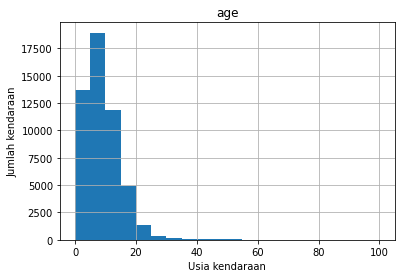

In [304]:
# membuat grafik histogram parameter usia kendaraan
data.hist('age', bins=20, range=(0,100))

plt.ylabel('Jumlah kendaraan')
plt.xlabel('Usia kendaraan')

From the histogram graph above, it can be seen that the peak age of a vehicle is 10 years, and the higher the age of the vehicle, the lower the peak, which indicates that fewer vehicles with a high age are being sold. It can be seen that around `10000` vehicles are close to `0` years old. This is normal because there is a possibility that the vehicle being sold is a new car that is less than 1 year old or even less. We will look in more detail at the number of vehicles over 30 years old to check whether there are any outliers.

Text(0.5, 0, 'Usia kendaraan')

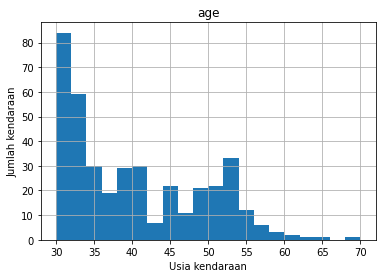

In [305]:
# membuat grafik histogram parameter usia kendaraan di rentang 30-70 tahun.
data.hist('age', bins=20, range=(30,70))

plt.ylabel('Jumlah kendaraan')
plt.xlabel('Usia kendaraan')

It can be seen that there are quite a lot of vehicles that are over 30 years old. However, there is a separate peak at the age range of 70 years, and it could be said that this data is an outlier, but it will be examined in more detail for the number of vehicles over the age of 65 years.

Text(0.5, 0, 'Usia kendaraan')

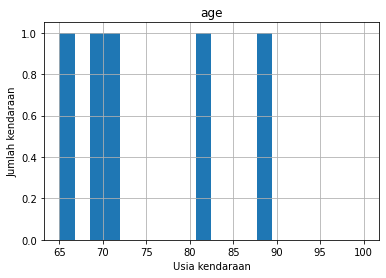

In [306]:
# membuat grafik histogram parameter usia kendaraan di rentang 30-60 tahun.
data.hist('age', bins=20, range=(65,100))

plt.ylabel('Jumlah kendaraan')
plt.xlabel('Usia kendaraan')

It can be seen that all peaks are separate from the rest of the data. The frame data will be displayed.

In [307]:
# menampilkan data frame dengan usia kendaraan diatas 60 tahun
data.query('age > 60')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
10018,23900,1955,ford f250,3,6,gas,47180.000000,manual,truck,blue,0,2018-12-22,61,ford,5,12,2018,63,748.888889
14752,15000,1954,ford f150,3,6,gas,3565.000000,manual,pickup,black,0,2019-02-16,13,ford,5,2,2019,65,54.846154
22595,21000,1948,chevrolet impala,4,8,gas,4000.000000,automatic,sedan,red,0,2019-01-18,24,chevrolet,4,1,2019,71,56.338028
33906,12995,1908,gmc yukon,2,8,gas,169328.000000,automatic,suv,black,0,2018-07-06,34,gmc,4,7,2018,110,1539.345455
33907,12995,1908,cadillac escalade,3,8,gas,15454.545455,automatic,suv,white,0,2018-06-24,25,cadillac,6,6,2018,110,140.495868
34713,5000,1936,ford f150,3,6,gas,30000.000000,manual,pickup,purple,0,2018-11-22,10,ford,3,11,2018,82,365.853659
36582,44900,1949,chevrolet suburban,2,8,gas,1800.000000,automatic,wagon,orange,0,2018-08-19,10,chevrolet,6,8,2018,69,26.086957
45694,18000,1929,ford f150,2,8,gas,14608.666667,manual,other,silver,0,2018-11-18,59,ford,6,11,2018,89,164.142322


There are several brands with vehicle models over 60 years old for sale. Normally, almost no vehicles are sold that are more than 20 years old, but it can be assumed that vehicles from the Chevrolet, Cadillac, Ford, and GMC brands are old vehicles that are in the collections of vehicle lovers. However, because the numbers are very rare, it can be concluded that vehicles over 65 years old are outliers.

For analysis and handling of outliers, we will use the the **BoxPlot** graph.

### `odometer` column parameter

Text(0, 0.5, 'Jumlah kendaraan')

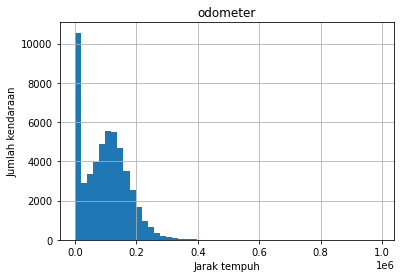

In [308]:
# membuat grafik histogram parameter jarak tempuh
data.hist('odometer', bins=50)

plt.xlabel('Jarak tempuh')
plt.ylabel('Jumlah kendaraan')

It can be seen that the highest peak of the data is near `0` miles, and this makes sense because a vehicle with a low odometer can be considered a new or like-new vehicle whose year it was released not long ago. It can also be seen that vehicles with high mileage are getting lower. The number of vehicles whose mileage is above `400,000` will be displayed in more detail.

Text(0, 0.5, 'Jumlah kendaraan')

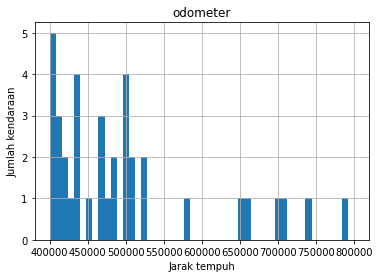

In [309]:
# membuat grafik histogram parameter jarak tempuh di rentang 400000 - 800000
data.hist('odometer', bins=50, range=(400000, 800000))

plt.xlabel('Jarak tempuh')
plt.ylabel('Jumlah kendaraan')

It can be seen that there are several peaks that are separated from the other values for distances above `450000`. Frame data with a distance above `450000` will be checked.

In [310]:
# menampilkan data frame dengan jarak tempuh kendaraan diatas 450000 mil
data.query('odometer > 450000')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
2264,2500,2001,toyota tundra,0,8,gas,482000.0,automatic,pickup,green,1,2019-02-08,22,toyota,4,2,2019,18,26777.777778
2440,5300,2010,toyota corolla,3,4,gas,840000.0,automatic,sedan,silver,0,2019-02-04,13,toyota,0,2,2019,9,93333.333333
2840,18500,2014,ford explorer,3,6,gas,866000.0,automatic,suv,black,1,2018-07-20,14,ford,4,7,2018,4,216500.000000
3107,3500,2002,ram 3500,2,6,diesel,498000.0,manual,other,white,0,2018-10-12,72,ram,4,10,2018,16,31125.000000
4818,8700,2013,chevrolet malibu,2,4,gas,500000.0,automatic,sedan,blue,0,2019-02-15,31,chevrolet,4,2,2019,6,83333.333333
5589,4995,2007,chevrolet silverado 1500,2,6,gas,469445.0,automatic,truck,white,0,2018-07-22,89,chevrolet,6,7,2018,11,42676.818182
5735,7500,2015,hyundai elantra,3,4,gas,813542.0,other,coupe,brown,0,2018-11-21,5,hyundai,2,11,2018,3,271180.666667
11124,5900,2014,chevrolet cruze,2,4,gas,510000.0,automatic,sedan,silver,0,2019-01-01,21,chevrolet,1,1,2019,5,102000.000000
13027,8500,2015,chevrolet malibu,3,4,gas,838095.0,automatic,sedan,silver,0,2018-05-30,10,chevrolet,2,5,2018,3,279365.000000
13853,6000,2001,ford f350 super duty,2,8,diesel,478000.0,automatic,pickup,blue,1,2019-02-15,36,ford,4,2,2019,18,26555.555556


It can be seen that there are several vehicle brands with very high mileage. Because this is common, to determine *outliers*, we will use the help of the **BoxPlot** graph.

### `cylinders` column parameter

Text(0, 0.5, 'Jumlah kendaraan')

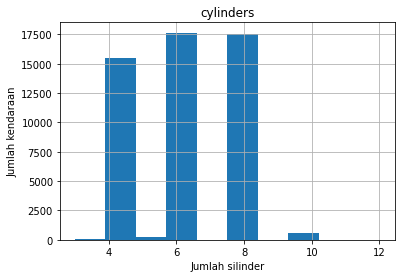

In [311]:
# membuat grafik histogram parameter jumlah silinder
data.hist('cylinders', bins=10)

plt.xlabel('Jumlah silinder')
plt.ylabel('Jumlah kendaraan')

The peak number of cylinders can be seen converging between 4 and 8, where a small peak can be seen at 10 cylinders. A histogram graph will be displayed for vehicles with fewer than four cylinders.

Text(0, 0.5, 'Jumlah kendaraan')

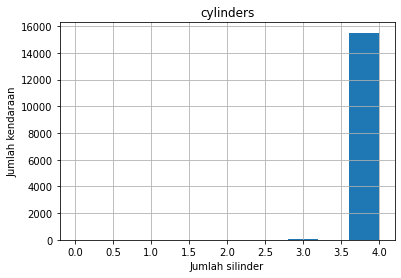

In [312]:
# membuat grafik histogram parameter jumlah silinder kurang dari 4
data.hist('cylinders', bins=10, range=(0, 4))

plt.xlabel('Jumlah silinder')
plt.ylabel('Jumlah kendaraan')

A small peak can be seen with the number of cylinders being 3, and this is something that usually happens, so for this column, we can be sure that there are no *outliers* because the data distribution is almost even (seen from the peak for each number of cylinders).

### `condition` column parameter

Text(0, 0.5, 'Jumlah kendaraan')

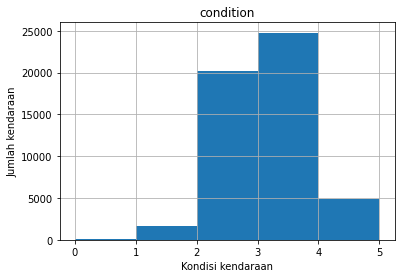

In [313]:
# membuat grafik histogram parameter kondisi kendaraan
data.hist('condition', bins=5)

plt.xlabel('Kondisi kendaraan')
plt.ylabel('Jumlah kendaraan')

Based on the graph, it can be seen that the highest peak is with `3` or `excellent` vehicle condition, where the number of `fair` and `salvage` vehicle conditions is very low. This is a common place, so data on the condition of this car is not considered an outlier.

## Study and Handle Outliers

Studying outliers is done with the help of the **BoxPlot** graph to analyze what *outliers* look like in each column that is suspected to have outliers based on previous analysis.

Columns that have *outliers* are:
1. `price`
2. `age`
3. `odometer`

After knowing the *outlier* value, a new DataFrame will be created without the *outlier*.

### Analysis and handling of outliers in the `price` column

(-100.0, 200000.0)

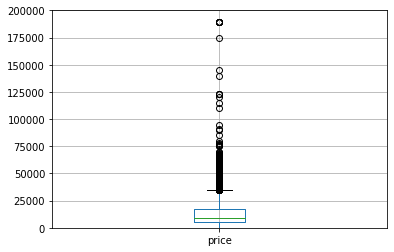

In [314]:
# menampilkan grafik boxplot pada kolom price
data.boxplot('price')

plt.ylim(-100, 200000)

It can be seen that the *whisker* is not symmetrical to the box, where the bottom *whisker* coincides with the minimum value `0`. A graphic analysis will be carried out by displaying *whisker* with **theoretical** values.

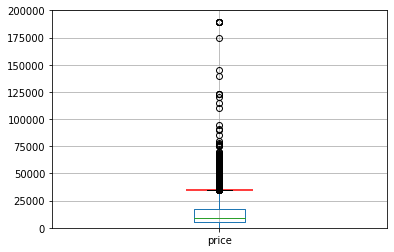

In [315]:
# menampilkan grgafik boxplot dengan whisker teoritis bagian atas
Q1_price = data['price'].quantile(0.25)
Q3_price = data['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price
plt.ylim(0, 200000)
data.boxplot('price')
plt.hlines(y=Q3_price + 1.5*IQR_price, xmin=0.9, xmax=1.1, color='red')

It can be seen that the theoretical *whisker* (red line) is almost the same as the *whisker* from the boxplot shown; the upper theoretical whisker will guide the upper limit of the *outliers* in the `price` column.

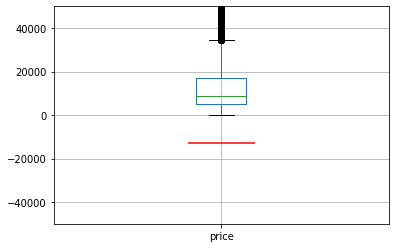

In [316]:
# menampilkan grgafik boxplot dengan whisker teoritis bagian bawah
plt.ylim(-50000, 50000)
data.boxplot('price')
plt.hlines(y=[Q1_price - 1.5*IQR_price], xmin=0.9, xmax=1.1, color='red')

It can be seen that the lower limit of the theoretical *whisker* value is far below `0`, so it can be concluded that the data in the `price` column is centered on a smaller value.

Based on previous analysis, it is known that the number of vehicles sold at low prices of less than `2000` is very low, so values below `2000` are not included in the analysis.

Next, a new dataframe will be created without the top *outlier*.

In [317]:
# Menyimpan data frame tanpa outlier pada variabel good_price_data
limit_upper_whisker_price = Q3_price + 1.5*IQR_price
good_price_data = data.query('2000 < price < @limit_upper_whisker_price')
good_price_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,suv,black,1,2018-06-23,19,bmw,5,6,2018,7,20714.285714
1,25500,2011,ford f150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,ford,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,hyundai,3,2,2019,6,18333.333333
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,chrysler,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,chrysler,2,6,2018,4,14488.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,nissan,2,10,2018,5,17627.200000
51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,honda,2,11,2018,16,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,hyundai,3,11,2018,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,toyota,0,7,2018,5,27914.600000


### Analysis and handling of outliers in the `age` column

(0.0, 100.0)

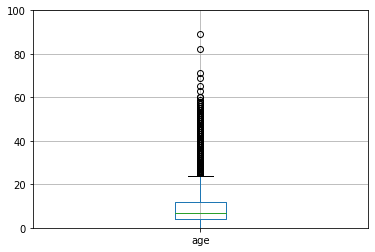

In [318]:
# menampilkan grafik boxplot pada kolom age
data.boxplot('age')

plt.ylim(0, 100)

It can be seen that the *whisker* is not symmetrical to the box, where the bottom *whisker* coincides with the minimum value `0`. A graphic analysis will be carried out by displaying *whisker* with **theoretical** values.

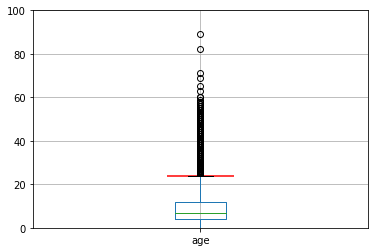

In [319]:
# menampilkan whisker teoritis bagian atas pada grafik boxplot
Q1_age = data['age'].quantile(0.25)
Q3_age = data['age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
plt.ylim(0, 100)
data.boxplot('age')
plt.hlines(y=Q3_age + 1.5*IQR_age, xmin=0.9, xmax=1.1, color='red')

It can be seen that the theoretical *whisker* (red line) is almost the same as the *whisker* from the boxplot shown; the upper theoretical *whisker* will be a guide to the upper limit of the *outliers* in the `age` column.

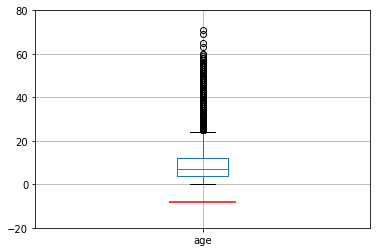

In [320]:
# menampilkan whisker teoritis bagian atas pada grafik boxplot
plt.ylim(-20, 80)
data.boxplot('age')
plt.hlines(y=[Q1_age-1.5*IQR_age], xmin=0.9, xmax=1.1, color='red') 

It can be seen that the lower limit of the theoretical *whisker* value is far below `0`, so it can be concluded that the data in the `age` column is centered on a smaller value.

Next, a new dataframe will be created without the top *outlier*.

In [321]:
# Menyimpan data frame tanpa outlier pada variabel good_age_data
limit_upper_whisker_age = Q3_age + 1.5*IQR_age
good_age_data = data.query('age < @limit_upper_whisker_age')
good_age_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
0,9400,2011,bmw x5,2,6,gas,145000.000000,automatic,suv,black,1,2018-06-23,19,bmw,5,6,2018,7,20714.285714
1,25500,2011,ford f150,2,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,ford,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,hyundai,3,2,2019,6,18333.333333
3,1500,2003,ford f150,1,8,gas,15880.423077,automatic,pickup,white,0,2019-03-22,9,ford,4,3,2019,16,992.526442
4,14900,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,chrysler,1,4,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,nissan,2,10,2018,5,17627.200000
51521,2700,2002,honda civic,0,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,honda,2,11,2018,16,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,hyundai,3,11,2018,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,toyota,0,7,2018,5,27914.600000


### Analysis and handling of outliers in the `odometer` column

(0.0, 800000.0)

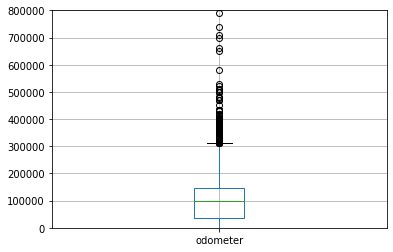

In [322]:
# Menampilkan grafik boxplot pada kolom odometer
data.boxplot('odometer')

plt.ylim(0, 800000)

It can be seen that the *whisker* is not symmetrical to the box, where the bottom *whisker* coincides with the minimum value `0`. A graphic analysis will be carried out by displaying *whisker* with **theoretical** values.

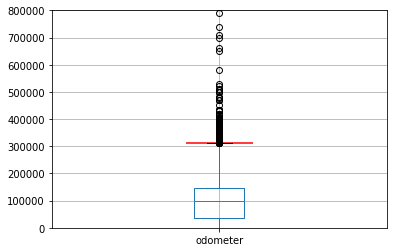

In [323]:
# menampilkan whisker teoritis bagian atas pada grafik boxplot
Q1_odo = data['odometer'].quantile(0.25)
Q3_odo = data['odometer'].quantile(0.75)
IQR_odo = Q3_odo - Q1_odo
plt.ylim(0, 800000)
data.boxplot('odometer')
plt.hlines(y=Q3_odo + 1.5*IQR_odo, xmin=0.9, xmax=1.1, color='red')

It can be seen from the graph that the theoretical *whisker* at the top is almost the same as the whisker in the boxplot. is displayed. The theoretical *whisker* will be a guideline for determining the upper *outlier* limit.

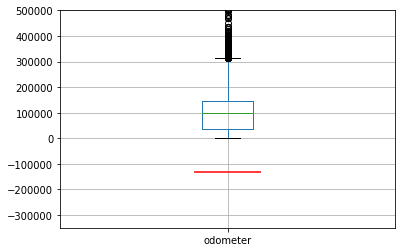

In [324]:
# menampilkan whisker teoritis bagian bawah pada grafik boxplot
plt.ylim(-350000, 500000)
data.boxplot('odometer')
plt.hlines(y=[Q1_odo - 1.5*IQR_odo], xmin=0.9, xmax=1.1, color='red')

It can be seen that the theoretical *whisker* is far below the number `0`, so it can be concluded that the data in the `odometer` column is centered on a small value.

Next, a new data frame will be created without the top *outlier*.

In [325]:
# Menyimpan data frame tanpa outlier pada variabel good_odo_data
limit_upper_whisker_odo = Q3_odo + 1.5*IQR_odo
good_odo_data = data.query('odometer < @limit_upper_whisker_odo')
good_odo_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
0,9400,2011,bmw x5,2,6,gas,145000.000000,automatic,suv,black,1,2018-06-23,19,bmw,5,6,2018,7,20714.285714
1,25500,2011,ford f150,2,6,gas,88705.000000,automatic,pickup,white,1,2018-10-19,50,ford,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.000000,automatic,sedan,red,0,2019-02-07,79,hyundai,3,2,2019,6,18333.333333
3,1500,2003,ford f150,1,8,gas,15880.423077,automatic,pickup,white,0,2019-03-22,9,ford,4,3,2019,16,992.526442
4,14900,2017,chrysler 200,3,4,gas,80903.000000,automatic,sedan,black,0,2019-04-02,28,chrysler,1,4,2019,2,40451.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136.000000,automatic,sedan,black,0,2018-10-03,37,nissan,2,10,2018,5,17627.200000
51521,2700,2002,honda civic,0,4,gas,181500.000000,automatic,sedan,white,0,2018-11-14,22,honda,2,11,2018,16,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000.000000,automatic,sedan,blue,0,2018-11-15,32,hyundai,3,11,2018,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573.000000,automatic,sedan,black,0,2018-07-02,71,toyota,0,7,2018,5,27914.600000


## Learn Core Parameters Without Outliers

A new data frame has been obtained in the `price`, `age`, and `odometer` columns and has been stored in variables:
1. `good_price_data` - contains a data frame without very high price outliers.
2. `good_age_data` - contains a data frame without very high vehicle age outliers.
3. `good_odo_data`- contains a data frame without very high odometer outliers.

### `price` column

Text(0, 0.5, 'Jumlah kendaraan')

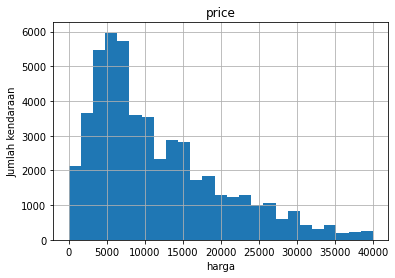

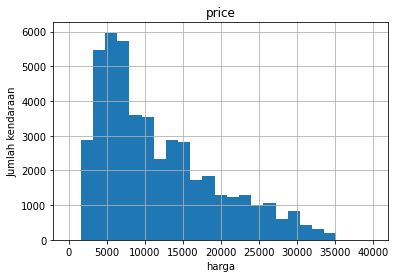

In [326]:
# membuat grafik histogram parameter harga dengan outlier
data.hist('price', bins=25, range=(0, 40000))

plt.xlabel('harga')
plt.ylabel('Jumlah kendaraan')

# membuat grafik histogram parameter harga tanpa outlier
good_price_data.hist('price', bins=25, range=(0, 40000))

plt.xlabel('harga')
plt.ylabel('Jumlah kendaraan')

<AxesSubplot:>

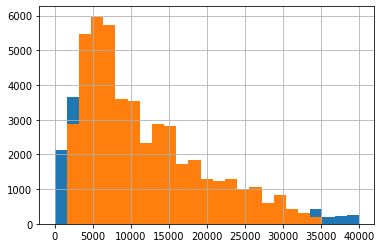

In [327]:
# membandingkan histogram pada kolom price dengan dan tanpa outlier
data['price'].hist(bins=25, range=(0,40000))
good_price_data['price'].hist(bins=25, range=(0,40000))

It can be seen that there is a difference regarding low and high prices, but for the highest peak the data is still at the value `5000`. Next, a histogram comparison analysis will be carried out in the `age` column.

### `age`column

Text(0, 0.5, 'Jumlah kendaraan')

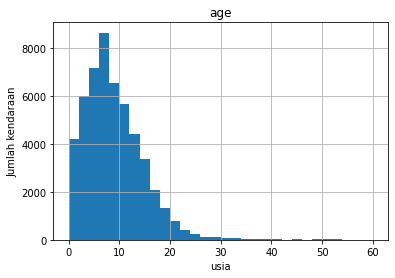

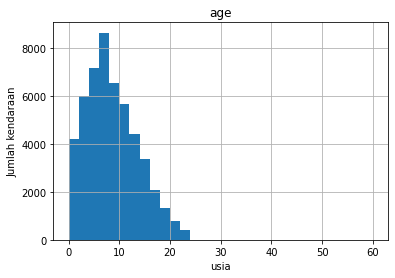

In [328]:
# membuat grafik histogram parameter usia dengan outlier
data.hist('age', bins=30, range=(0, 60))

plt.xlabel('usia')
plt.ylabel('Jumlah kendaraan')

# membuat grafik histogram parameter usia tanpa outlier
good_age_data.hist('age', bins=30, range=(0, 60))

plt.xlabel('usia')
plt.ylabel('Jumlah kendaraan')

<AxesSubplot:>

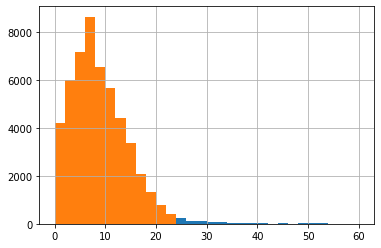

In [329]:
# membandingkan histogram pada kolom age dengan dan tanpa outlier
data['age'].hist(bins=30, range=(0,60))
good_age_data['age'].hist(bins=30, range=(0,60))

It can be seen that there is a large difference related to age, but for the highest peak, the data is still at the age value of `8 years`. Next, a histogram comparison analysis will be carried out in the `odometer` column.

### `odometer` column

Text(0, 0.5, 'Jumlah kendaraan')

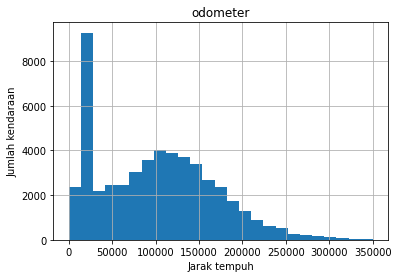

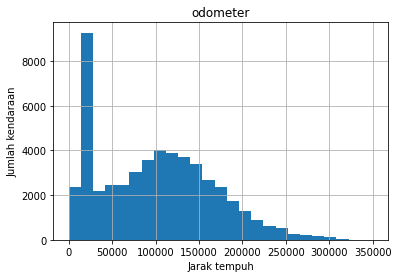

In [330]:
# membuat grafik histogram parameter jarak tempuh dengan outlier
data.hist('odometer', bins=25, range=(0, 350000))

plt.xlabel('Jarak tempuh')
plt.ylabel('Jumlah kendaraan')

# membuat grafik histogram parameter jarak tempuh tanpa outlier
good_odo_data.hist('odometer', bins=25, range=(0, 350000))

plt.xlabel('Jarak tempuh')
plt.ylabel('Jumlah kendaraan')

<AxesSubplot:>

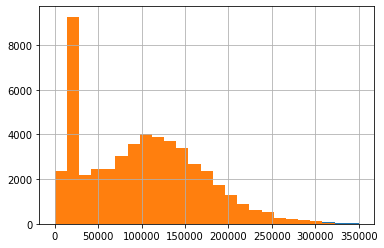

In [331]:
# membandingkan histogram pada kolom odometer dengan dan tanpa outlier
data['odometer'].hist(bins=25, range=(0,350000))
good_odo_data['odometer'].hist(bins=25, range=(0,350000))

There is no striking difference in data with outliers and without outliers, meaning that the odometer data is mostly centered in the middle of the data even though the distribution is not even.

## Ad Validity Period
In the previous stage, outliers were removed in the price, age, and odometer columns. So for further analysis, we will use a data frame without *outlier* columns in the three columns.

The validity period of the advertisement means the length of time the advertisement is on the website. For the time being, it will be considered that if the vehicle has been sold, the system will automatically delete the advertisement.

In [332]:
# menyimpan DataFrame baru tanpa outlier kedalam variabel good_data
limit_upper_whisker_age = Q3_age + 1.5*IQR_age
limit_upper_whisker_odo = Q3_odo + 1.5*IQR_odo
good_data_age = good_price_data.query('age < @limit_upper_whisker_age')
good_data = good_data_age.query('odometer < @limit_upper_whisker_odo')
good_data

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,suv,black,1,2018-06-23,19,bmw,5,6,2018,7,20714.285714
1,25500,2011,ford f150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,ford,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,hyundai,3,2,2019,6,18333.333333
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,chrysler,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,chrysler,2,6,2018,4,14488.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,nissan,2,10,2018,5,17627.200000
51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,honda,2,11,2018,16,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,hyundai,3,11,2018,9,14222.222222
51523,7455,2013,toyota corolla,2,4,gas,139573.0,automatic,sedan,black,0,2018-07-02,71,toyota,0,7,2018,5,27914.600000


Rata-rata iklan ditayangkan: 39.567217313912344
Median iklan ditayangkan: 33.0


Text(0, 0.5, 'Jumlah kendaraan')

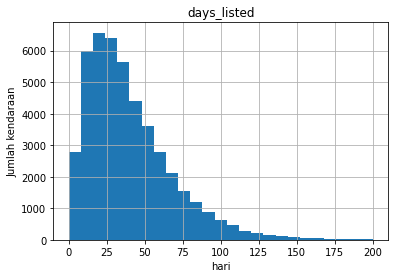

In [333]:
# menampilkan rata-rata dan median kolom days_listed
days_listed_mean = good_data['days_listed'].mean()
days_listed_median = good_data['days_listed'].median()
print(f'Rata-rata iklan ditayangkan: {days_listed_mean}')
print(f'Median iklan ditayangkan: {days_listed_median}')

# menampilkan histogram kolom days_listed
good_data.hist('days_listed', bins=25, range=(0, 200))

plt.xlabel('hari')
plt.ylabel('Jumlah kendaraan')

From the statistical data above, usually advertisements are displayed for around 33 days. This is also proven by the histogram graphic display, where the peak data ranges from `25-50 days`. The average ad duration is higher than the median because there is some data where the ad duration is even more than 5x the median.

It will display any vehicle models that were sold in less than 33 days or longer than 33 days.

In [334]:
# menyimpan DataFrame iklan dengan durasi iklan kurang dari 30 hari dalam variabel good_data_high_demand
good_data_high_demand = good_data.query('days_listed < @days_listed_median')
good_data_high_demand

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
0,9400,2011,bmw x5,2,6,gas,145000.0,automatic,suv,black,1,2018-06-23,19,bmw,5,6,2018,7,20714.285714
4,14900,2017,chrysler 200,3,4,gas,80903.0,automatic,sedan,black,0,2019-04-02,28,chrysler,1,4,2019,2,40451.500000
5,14990,2014,chrysler 300,3,6,gas,57954.0,automatic,sedan,black,1,2018-06-20,15,chrysler,2,6,2018,4,14488.500000
8,11500,2012,kia sorento,3,4,gas,104174.0,automatic,suv,white,1,2018-07-16,19,kia,0,7,2018,6,17362.333333
9,9200,2008,honda pilot,3,4,gas,147191.0,automatic,suv,blue,1,2019-02-15,17,honda,4,2,2019,11,13381.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51509,5980,2010,subaru impreza,3,4,gas,121778.0,manual,hatchback,white,1,2019-01-10,8,subaru,3,1,2019,9,13530.888889
51513,17999,2014,ram 1500,4,8,gas,154000.0,automatic,pickup,white,1,2018-06-21,11,ram,3,6,2018,4,38500.000000
51521,2700,2002,honda civic,0,4,gas,181500.0,automatic,sedan,white,0,2018-11-14,22,honda,2,11,2018,16,11343.750000
51522,3950,2009,hyundai sonata,3,4,gas,128000.0,automatic,sedan,blue,0,2018-11-15,32,hyundai,3,11,2018,9,14222.222222


It will be seen when ads that are less than 33 days long are shown.

In [335]:
# menampilkan tanggal dimana iklan diposting pada kolom day posted
good_data_high_demand['day_posted'].value_counts()

5    3258
1    3229
0    3227
4    3214
2    3202
3    3190
6    3167
Name: day_posted, dtype: int64

Based on the data above, it is known that the speed at which a vehicle is advertised is not influenced by the day the vehicle starts to be advertised, right? Data will be displayed based on the month advertised.

In [336]:
# menampilkan tanggal dimana iklan diposting pada kolom month posted
good_data_high_demand['month_posted'].value_counts()

10    2061
12    1994
1     1989
7     1964
5     1958
9     1948
11    1946
3     1938
8     1931
6     1824
2     1721
4     1213
Name: month_posted, dtype: int64

Based on the data above, it can be seen that the speed at which a vehicle is advertised is also not influenced by the month the vehicle was advertised.

In [337]:
# menyimpan DataFrame iklan dengan durasi iklan lebih dari 33 hari dalam variabel good_data_high_demand
good_data_low_demand = good_data.query('days_listed > @days_listed_median')
good_data_low_demand

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,brand,day_posted,month_posted,year_posted,age,odometer_year
1,25500,2011,ford f150,2,6,gas,88705.0,automatic,pickup,white,1,2018-10-19,50,ford,4,10,2018,7,12672.142857
2,5500,2013,hyundai sonata,4,4,gas,110000.0,automatic,sedan,red,0,2019-02-07,79,hyundai,3,2,2019,6,18333.333333
6,12990,2015,toyota camry,3,4,gas,79212.0,automatic,sedan,white,0,2018-12-27,73,toyota,3,12,2018,3,26404.000000
7,15990,2013,honda pilot,3,6,gas,109473.0,automatic,suv,black,1,2019-01-07,68,honda,0,1,2019,6,18245.500000
10,19500,2011,chevrolet silverado 1500,3,8,gas,128413.0,automatic,pickup,black,1,2018-09-17,38,chevrolet,0,9,2018,7,18344.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51517,11000,2012,dodge charger,3,8,gas,81000.0,automatic,sedan,black,0,2019-04-19,44,dodge,4,4,2019,7,11571.428571
51518,3750,2005,ford taurus,3,6,gas,110200.0,automatic,sedan,silver,0,2018-08-10,63,ford,4,8,2018,13,8476.923077
51519,11750,2015,honda accord,3,4,gas,10600.0,automatic,coupe,grey,0,2018-11-24,89,honda,5,11,2018,3,3533.333333
51520,9249,2013,nissan maxima,4,6,gas,88136.0,automatic,sedan,black,0,2018-10-03,37,nissan,2,10,2018,5,17627.200000


In [338]:
# menampilkan tanggal dimana iklan diposting pada kolom day posted
good_data_low_demand['day_posted'].value_counts()

3    3414
5    3289
6    3245
2    3242
4    3232
0    3214
1    3194
Name: day_posted, dtype: int64

Based on the data above, it is known that the length of vehicle advertising is not influenced by the day the vehicle starts to be advertised, right? Data will be displayed based on the month advertised.

In [339]:
# menampilkan tanggal dimana iklan diposting pada kolom month posted
good_data_low_demand['month_posted'].value_counts()

5     2037
3     2032
12    2002
8     1993
7     1984
9     1981
10    1981
1     1951
11    1922
6     1889
2     1783
4     1275
Name: month_posted, dtype: int64

Based on the data above, it can be seen that the speed at which a vehicle is advertised is also not influenced by the month the vehicle starts to be advertised, right?

From the analysis above, it can be concluded that the posting date of a vehicle advertisement does not affect how quickly or how long the advertisement is displayed or removed from the website, so further analysis is needed as to what factors influence the validity period of the advertisement.

## Average Price of Each Type of Vehicle

The next step is to analyze the number of advertisements and average prices based on vehicle type. Then data will be taken on the two types of vehicles with the most advertisements to analyze vehicle price factors.

In [340]:
# membuat pivot tabel berdasarkan jenis kendaraan dan harga
type_vehicle = good_data.pivot_table(index='type', values='price')
type_vehicle

,price
type,
bus,18107.428571
convertible,13697.898148
coupe,14555.790885
hatchback,7172.346597
mini-van,8439.849631
offroad,14736.084746
other,10924.964444
pickup,15285.917589
sedan,7477.294701


Text(0, 0.5, 'Jumlah kendaraan')

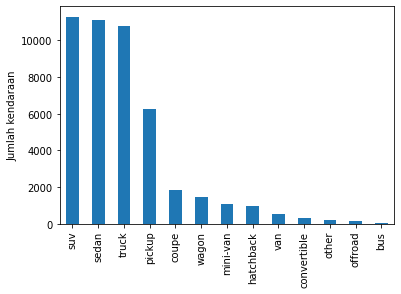

In [341]:
# membuat histogram berdasarkan jenis kendaraan
type_vehicle = good_data['type'].value_counts()
type_vehicle.plot(kind='bar')
plt.ylabel('Jumlah kendaraan')

It can be seen that the most frequently advertised vehicle types are `suv` and `sedan`, where the average price for `suv` is `11006` and for `sedan` is `7477`, so the vehicle types are `suv` and `sedan`. `Sedan` will be used as a reference for analyzing vehicle selling price factors.

<AxesSubplot:xlabel='price', ylabel='type'>

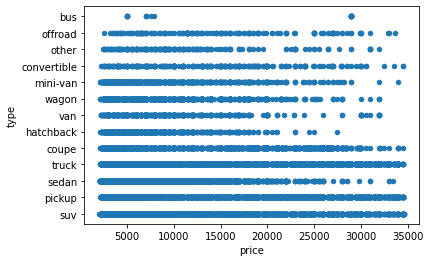

In [342]:
# menampilkan scatter plot
good_data.plot(x='price', y='type', kind='scatter') 

From the scatter graph, it can be seen that the type of `suv` vehicle is quite varied, while the price of most `sedan' type vehicles is less than `25000`.

## Price factor

At this stage an analysis will be carried out on the factors that influence the price of `suv` and `sedan` type vehicles, the factors that will be examined are
- `vehicle age`
- `mileage`
- `condition`
- `transmission type`
- `color`

### `suv` vehicle

Before starting the analysis, a DataFrame will be taken that only contains vehicles of the type `suv` from the DataFrame `good_data` that has been cleaned of *outliers*.

In [343]:
# menyimpan dataframe yang menyimpan jenis kendaraan suv
suv_vehicle = good_data.query('type == "suv"')
suv_vehicle_factor_1 = suv_vehicle[['price', 'age', 'odometer', 'condition']]
suv_vehicle_factor_1

,price,age,odometer,condition
0,9400,7,145000.000000,2
7,15990,6,109473.000000,3
8,11500,6,104174.000000,3
9,9200,11,147191.000000,3
14,12990,10,132285.000000,3
...,...,...,...,...
51495,9500,7,144500.000000,2
51496,4999,16,177901.000000,3
51500,6995,6,157000.000000,3
51502,7995,8,111088.000000,4


              price       age  odometer  condition
price      1.000000 -0.644997 -0.441276   0.267870
age       -0.644997  1.000000  0.417832  -0.255095
odometer  -0.441276  0.417832  1.000000  -0.216608
condition  0.267870 -0.255095 -0.216608   1.000000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='age', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='odometer', ylabel='age'>,
        <AxesSubplot:xlabel='condition', ylabel='age'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='age', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='age', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>]],
      dtype=object)

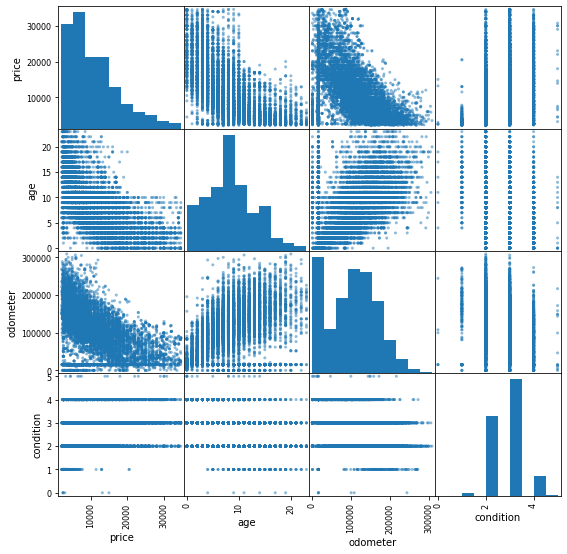

In [344]:
# menampilkan kmatriks korelasi dan grafik matriks sebara terhadap parameter harga, usia, jarak tempuh, dan kondisi kendaraan
print(suv_vehicle_factor_1.corr())
pd.plotting.scatter_matrix(suv_vehicle_factor_1, figsize=(9,9))

From the scatter matrix graph and correlation matrix data, it is concluded that:
1. It can be seen in the 2nd graph from the top in the price column that the age value is decreasing, followed by an increase in the vehicle price; this indicates that the age of the vehicle is inversely proportional to the vehicle price. This is also proven by the correlation value being `negative` close to -1, which indicates that the relationship between these two parameters is quite strong and is inversely proportional.
2. It can be seen in the 3rd graph from the top in the price column that the odometer value is decreasing, followed by an increase in the vehicle price. This indicates that the distance traveled by the vehicle is inversely proportional to the vehicle price, but not always. This is also proven by the correlation value being `negative` close to 0, which indicates that there is little connection between these two parameters.
3. It can be seen in the first graph from the bottom in the price column that vehicle prices are not influenced by low or high condition values. This is also proven by the `positive` correlation value approaching 0, which means there is no connection between the condition of the car and the selling price of the vehicle.

Text(0, 0.5, 'harga')

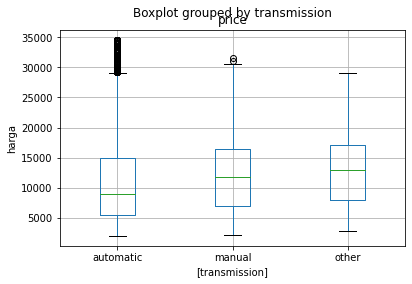

In [345]:
# menampilkan boxplot untuk faktor tipe transmisi
suv_vehicle_factor_2 = suv_vehicle[['transmission', 'price']]
suv_vehicle_factor_2.boxplot(by='transmission')

plt.ylabel('harga')

From the **boxplot** graph above, it is known that the median value of the `other` transmission type is the vehicle with the highest selling price compared to the manual and automatic types. This type of vehicle is thought to be a hybrid vehicle that has two automatic and manual gearboxes.

Text(0, 0.5, 'harga')

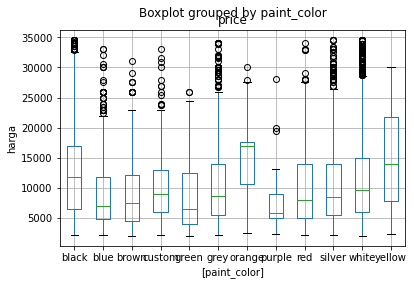

In [346]:
# menampilkan boxplot untuk faktor paint_color
suv_vehicle_factor_3 = suv_vehicle[['paint_color', 'price']]
suv_vehicle_factor_3.boxplot(by='paint_color')

plt.ylabel('harga')

From the **boxplot** graph above, it is known that the median value for the color `orange` is the vehicle with the highest selling price compared to other colors.

Next, an analysis will be carried out on the type of vehicle `sedan`.

### `sedan` vehicle

In [347]:
# menyimpan dataframe yang menyimpan jenis kendaraan sedan
sedan_vehicle = good_data.query('type == "sedan"')
sedan_vehicle_factor_1 = sedan_vehicle[['price', 'age', 'odometer', 'condition']]
sedan_vehicle_factor_1

,price,age,odometer,condition
2,5500,6,110000.0,4
4,14900,2,80903.0,3
5,14990,4,57954.0,3
6,12990,3,79212.0,3
11,8990,7,111142.0,3
...,...,...,...,...
51520,9249,5,88136.0,4
51521,2700,16,181500.0,0
51522,3950,9,128000.0,3
51523,7455,5,139573.0,2


              price       age  odometer  condition
price      1.000000 -0.679228 -0.477032   0.285592
age       -0.679228  1.000000  0.429569  -0.225624
odometer  -0.477032  0.429569  1.000000  -0.219026
condition  0.285592 -0.225624 -0.219026   1.000000


array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='age', ylabel='price'>,
        <AxesSubplot:xlabel='odometer', ylabel='price'>,
        <AxesSubplot:xlabel='condition', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='odometer', ylabel='age'>,
        <AxesSubplot:xlabel='condition', ylabel='age'>],
       [<AxesSubplot:xlabel='price', ylabel='odometer'>,
        <AxesSubplot:xlabel='age', ylabel='odometer'>,
        <AxesSubplot:xlabel='odometer', ylabel='odometer'>,
        <AxesSubplot:xlabel='condition', ylabel='odometer'>],
       [<AxesSubplot:xlabel='price', ylabel='condition'>,
        <AxesSubplot:xlabel='age', ylabel='condition'>,
        <AxesSubplot:xlabel='odometer', ylabel='condition'>,
        <AxesSubplot:xlabel='condition', ylabel='condition'>]],
      dtype=object)

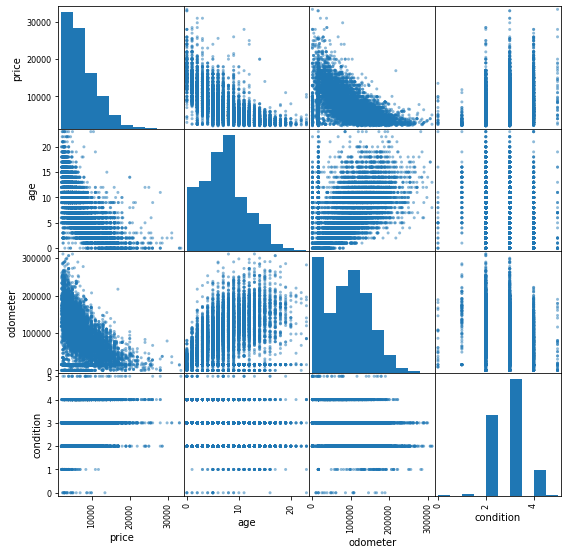

In [348]:
# menampilkan kmatriks korelasi dan grafik matriks sebara terhadap parameter harga, usia, jarak tempuh, dan kondisi kendaraan
print(sedan_vehicle_factor_1.corr())
pd.plotting.scatter_matrix(sedan_vehicle_factor_1, figsize=(9,9))

From the scatter matrix graph and correlation matrix data, it is concluded that:
1. It can be seen in the 2nd graph from the top in the price column that the age value is decreasing, followed by an increase in the vehicle price; this indicates that the age of the vehicle is inversely proportional to the vehicle price. This is also proven by the correlation value being `negative` close to -1, which indicates that the relationship between these two parameters is quite strong and is inversely proportional.
2. It can be seen in the 3rd graph from the top in the price column that the odometer value is decreasing, followed by an increase in the vehicle price. This indicates that the distance traveled by the vehicle is inversely proportional to the vehicle price, but not always. This is also proven by the correlation value being `negative` close to 0, which indicates that there is little connection between these two parameters.
3. It can be seen in the first graph from the bottom in the price column that vehicle prices are not influenced by low or high condition values. This is also proven by the `positive` correlation value approaching 0, which means there is no connection between the condition of the car and the selling price of the vehicle.

Text(0, 0.5, 'harga')

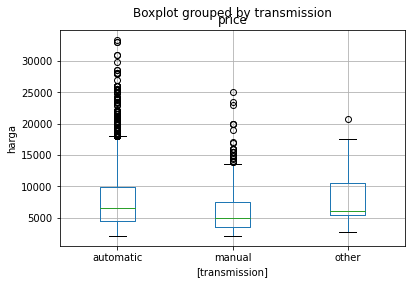

In [349]:
# menampilkan boxplot untuk faktor tipe transmisi
sedan_vehicle_factor_2 = sedan_vehicle[['transmission', 'price']]
sedan_vehicle_factor_2.boxplot(by='transmission')

plt.ylabel('harga')

Based on the **boxplot** graph above, it is known that the highest median price is for vehicles with automatic transmission.

Text(0, 0.5, 'harga')

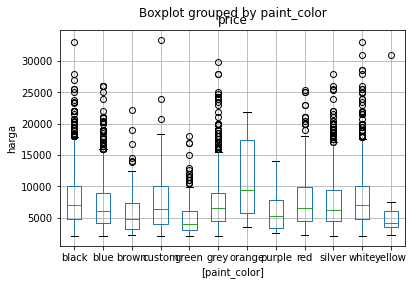

In [350]:
# menampilkan boxplot untuk faktor tipe warna
sedan_vehicle_factor_3 = sedan_vehicle[['paint_color', 'price']]
sedan_vehicle_factor_3.boxplot(by='paint_color')

plt.ylabel('harga')

Based on the **boxplot** graph above, it is known that the highest median price is for an orange sedan compared to other colored vehicles.

## General conclusion

The data obtained is free vehicle advertising data from the Crankshaft List website. The data contains 12 columns and 51525 rows. There were several problems found in the data frame, namely:
1. Indication of implicit duplication in `model` column.
2. Inconsistent data format in the `model` and `type` columns.
3. Data types that are not relevant to the `column' title and the data contents in the relevant column are in the `model_year`, `cylinders`, `is_4wd`, and `date_posted` columns.
4. Missing data is found in the `model_year` column as much as `7.02%`, the `cylinders` column as much as `10.21%`, the `odometer` column as much as `15.31%`, the `paint_color` column as much as `17.98%`, and `is_4wd` as much as `50.37%`.
5. There are somewhat unreasonable values in the `price` and `model_year` columns.

To overcome these problems, the steps taken are:
1. Fixed implicit duplication with .unique() and .replace() methods to improve data format.
2. Fixed the column so that data characters become lowercase in the `type` column.
3. Correct missing values with the help of functions by:
- median value based on vehicle brand in the `model_year` column
- median value based on vehicle brand in the `cylinders` column
- replace with numeric 0 for Boolean `False` in column `is_4wd`
- median value based on vehicle type in the `odometer` column
- most colors based on brand in the `paint_color` column
4. Change the data type in the `model_year` column to integer, the `cylinder` column to integer, the `is_4wd` column to integer, and the `date_posted` column to DateTime.
In the next stage, several new columns were also added, such as `day_posted`, `month_posted`, `year_posted`, `age`, and the average odometer column for a year in the `odometer_year` column. Also, change the string value in the `condition` column to numeric.

After the DataFrame has been repaired from the problems above, the top *outliers* are cleaned with the help of **Q3 + 1.5*IQR** values in each of the `price`, `age`, and `odometer` columns so that the correlation analysis determines the factors price is not biased.
To test the hypothesis, a vehicle data frame with the most vehicle types in the `type` column was taken, and it was found that `suv` and `sedan` vehicles were the most advertised.

Based on the correlation test, it is obtained:
1. The age of the vehicle is inversely related to the selling price of the vehicle, where the lower the age of the vehicle, the higher the selling price.
2. The vehicle mileage is inversely related to the vehicle selling price, where the lower the vehicle mileage, the higher the selling price, but this does not always apply the same for every vehicle model.
3. The condition of the vehicle does not really affect the selling price of the vehicle, although there is a small possibility that the newer the condition of the car, the price will tend to be higher.
4. For the `suv` vehicle type, the `other` transmission type tends to have a higher price compared to the automatic and manual types, however, for the `sedan` vehicle type, the `automatic` transmission type tends to have a higher price.
5. The vehicle color 'orange' is a vehicle color that tends to be higher than other colors.